What is the relationship between the stroke population to diabetes, heart disease, and high blood pressure in respect to geographical area?
Five factors contribute to stroke.  
1.	Diabetes
2.	Heart Disease
3.	High Blood Pressure
4.	High Cholesterol
5.	Obesity


In [ ]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_org = pd.read_csv("MasterCapStoneFile_01.csv" )


#df_OB_O_Less = df.loc[df["OB_M_Value"] < 12] # 16 records
#df_OB_O_Grt50 = df.loc[df["OB_M_Value"] > 50.0 ] # 62 records

#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records

#df_HD_O_Greater  = df.loc[df["HD_M_Value"] > 15.0 ] #  records

#df_HBP_O_Less = df.loc[df["HBP_M_Value"] < 15.0] # 72 records
#df_HBP_O_Greater  = df.loc[df["HBP_M_Value"] > 50.0 ] #  records


#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 45.0 ] #  records

In [ ]:
# Removing outliers by query for the values to keep

df = df_org.query("`OB_M_Value` >=0 & `OB_M_Value` <51 & `DB_M_Value` >0 & `DB_M_Value` <19  & `HD_M_Value` <10  & `HD_M_Value` >1  & `HBP_M_Value` >13 & `HBP_M_Value` <46 & `HC_M_Value` >22 & `HC_M_Value` <42  & `Target_Value` >1 & `Target_Value` < 5" )
print(df)






In [783]:
#df["HD_M_Value"].describe()
#df["HC_M_Value"].describe()
#df["HBP_M_Value"].describe()
#df["OB_M_Value"].describe()
#df["DB_M_Value"].describe()
df["Target_Value"].describe()

count    19112.000000
mean         2.840828
std          0.850926
min          1.100000
25%          2.200000
50%          2.800000
75%          3.400000
max          4.900000
Name: Target_Value, dtype: float64

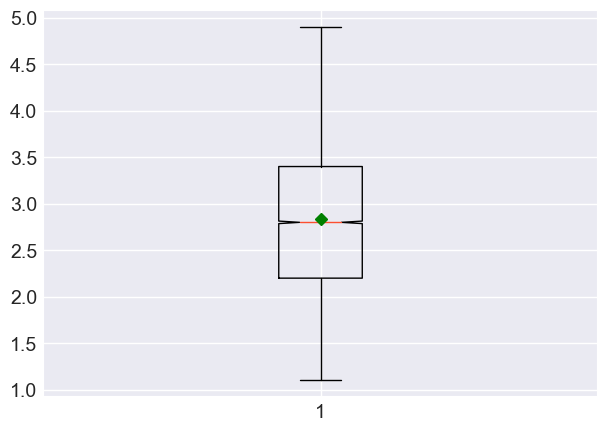

In [784]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 
plt.boxplot(x=df['Target_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

In [785]:
df.head()

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
0,4.2,6.4,-0.343750,32.3,32.4,-0.003086,34.1,34.1,0.000000,30.3,30.1,0.006645,12.2,10.8,0.129630,3.4
2,5.8,6.4,-0.093750,33.8,32.4,0.043210,36.7,34.1,0.076246,17.3,30.1,-0.425249,9.9,10.8,-0.083333,3.1
3,4.4,6.4,-0.312500,27.4,32.4,-0.154321,27.1,34.1,-0.205279,22.1,30.1,-0.265781,14.7,10.8,0.361111,2.0
5,3.5,6.4,-0.453125,24.4,32.4,-0.246914,27.5,34.1,-0.193548,25.3,30.1,-0.159468,11.4,10.8,0.055556,2.6
6,5.5,6.4,-0.140625,28.1,32.4,-0.132716,33.7,34.1,-0.011730,22.5,30.1,-0.252492,3.4,10.8,-0.685185,2.9


In [786]:
#print(df.isna)
df.isna().sum()

HD_M_Value      0
HD_M_US         0
HD_M_REL_US     0
HBP_M_Value     0
HBP_M_US        0
HBP_M_REL_US    0
HC_M_Value      0
HC_M_US         0
HC_M_REL_US     0
OB_M_Value      0
OB_M_US         0
OB_M_REL_US     0
DB_M_Value      0
DB_M_US         0
DB_M_REL_US     0
Target_Value    0
dtype: int64

In [787]:
# Count and determine the outliers 
HD_degree_counts = df['HD_M_Value'].value_counts() 
HBP_degree_counts = df['HBP_M_Value'].value_counts()
HC_degree_counts = df['HC_M_Value'].value_counts(normalize=True) # get the percentage for each group.
OB_degree_counts = df['OB_M_Value'].value_counts()
DB_degree_counts = df['DB_M_Value'].value_counts()

#print(HD_degree_counts)
#print(HBP_degree_counts)
#print(HC_degree_counts)
print(OB_degree_counts)
#print(DB_degree_counts)

26.8    118
27.1    113
26.5    113
27.9    112
24.6    109
       ... 
9.7       1
11.5      1
9.6       1
11.2      1
10.9      1
Name: OB_M_Value, Length: 404, dtype: int64


In [788]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583e+00,1.100000,4.100000,5.200000,6.400000,9.900000
HD_M_US,19112.0,6.400000,2.153001e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,19112.0,-0.169463,2.663412e-01,-0.828125,-0.359375,-0.187500,0.000000,0.546875
HBP_M_Value,19112.0,29.301020,6.360551e+00,13.100000,25.000000,28.800000,33.300000,45.900000
HBP_M_US,19112.0,32.400000,1.168873e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,19112.0,-0.095648,1.963133e-01,-0.595679,-0.228395,-0.111111,0.027778,0.416667
HC_M_Value,19112.0,31.673205,3.816437e+00,22.100000,29.100000,31.700000,34.300000,41.900000
HC_M_US,19112.0,34.100000,1.226429e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,19112.0,-0.071167,1.119190e-01,-0.351906,-0.146628,-0.070381,0.005865,0.228739
OB_M_Value,19112.0,29.778746,7.842022e+00,9.600000,24.000000,29.000000,34.800000,50.900000


In [789]:
# verifying outliers from the mean of both lower and upper quantiles.
# Obesity= 78
# Diabetes = 171

#df_OB_O_Less = df.loc[df["OB_M_Value"] < 12] # 16 records
#df_OB_O_Grt50 = df.loc[df["OB_M_Value"] > 50.0 ] # 62 records
#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records
#df_HD_O_Greater  = df.loc[df["HD_M_Value"] > 15.0 ] #  records
#df_HBP_O_Less = df.loc[df["HBP_M_Value"] < 15.0] # 72 records
#df_HBP_O_Greater  = df.loc[df["HBP_M_Value"] > 50.0 ] #  records
#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 50.0 ] #  records
#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 45.0 ] #  records

#=============================================================


df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] 
df_HC_O_Grter  = df.loc[df["HC_M_Value"] > 45.0 ] 

#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records
#print(df_HC_O_Less["HC_M_Value"].value_counts())
#print(df_HC_O_Grter["HC_M_Value"].value_counts())




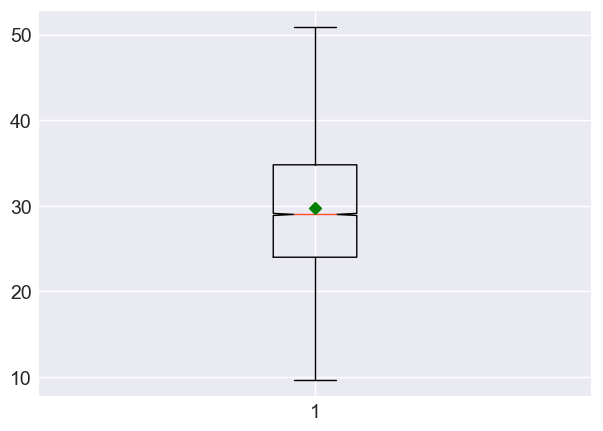

In [790]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['OB_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

C:\Users\dolly\AppData\Local\Temp\ipykernel_2988\2210461807.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OB_M_Value'])


<Axes: xlabel='OB_M_Value', ylabel='Density'>

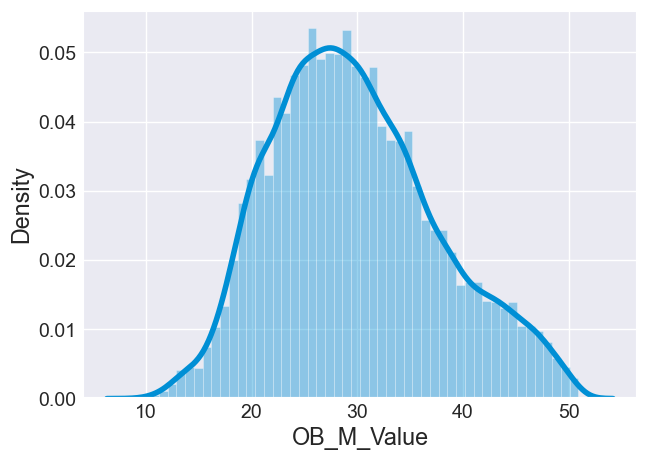

In [791]:
sns.distplot(df['OB_M_Value'])

In [792]:
df["OB_M_Value"].describe()



count    19112.000000
mean        29.778746
std          7.842022
min          9.600000
25%         24.000000
50%         29.000000
75%         34.800000
max         50.900000
Name: OB_M_Value, dtype: float64

In [793]:
np.percentile(df['OB_M_Value'], [25, 50, 75, 100])

array([24. , 29. , 34.8, 50.9])

In [794]:
import statistics

statistics.quantiles(df['OB_M_Value'])

[24.0, 29.0, 34.8]

In [795]:
# Quantile mean it divide data into group.
# 0.50 is the median or 50% quantile. It's 0.5 quantile. 

df_Percentile = df.describe([0.15, 0.25, 0.50, 0.75])
df_Percentile

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
count,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000
mean,5.315435,6.400000e+00,-0.169463,29.301020,3.240000e+01,-0.095648,31.673205,3.410000e+01,-0.071167,29.778746,3.010000e+01,-0.010673,10.153558,1.080000e+01,-0.059856,2.840828
std,1.704583,2.153001e-12,0.266341,6.360551,1.168873e-11,0.196313,3.816437,1.226429e-11,0.111919,7.842022,1.080408e-11,0.260532,3.429738,2.945277e-12,0.317568,0.850926
min,1.100000,6.400000e+00,-0.828125,13.100000,3.240000e+01,-0.595679,22.100000,3.410000e+01,-0.351906,9.600000,3.010000e+01,-0.681063,0.900000,1.080000e+01,-0.916667,1.100000
15%,3.600000,6.400000e+00,-0.437500,23.000000,3.240000e+01,-0.290123,27.600000,3.410000e+01,-0.190616,21.500000,3.010000e+01,-0.285714,6.700000,1.080000e+01,-0.379630,1.900000
25%,4.100000,6.400000e+00,-0.359375,25.000000,3.240000e+01,-0.228395,29.100000,3.410000e+01,-0.146628,24.000000,3.010000e+01,-0.202658,7.700000,1.080000e+01,-0.287037,2.200000
50%,5.200000,6.400000e+00,-0.187500,28.800000,3.240000e+01,-0.111111,31.700000,3.410000e+01,-0.070381,29.000000,3.010000e+01,-0.036545,9.800000,1.080000e+01,-0.092593,2.800000
75%,6.400000,6.400000e+00,0.000000,33.300000,3.240000e+01,0.027778,34.300000,3.410000e+01,0.005865,34.800000,3.010000e+01,0.156146,12.300000,1.080000e+01,0.138889,3.400000
max,9.900000,6.400000e+00,0.546875,45.900000,3.240000e+01,0.416667,41.900000,3.410000e+01,0.228739,50.900000,3.010000e+01,0.691030,18.900000,1.080000e+01,0.750000,4.900000


In [796]:
df_Percentile['HD_M_Value']

count    19112.000000
mean         5.315435
std          1.704583
min          1.100000
15%          3.600000
25%          4.100000
50%          5.200000
75%          6.400000
max          9.900000
Name: HD_M_Value, dtype: float64

In [797]:
df_Percentile['HD_M_Value'][0]

19112.0

In [798]:
df_Percentile['HD_M_Value']['mean']
df_Percentile['HD_M_Value']['std']
df_Percentile['HD_M_Value']['15%']

3.6

In [800]:
HD_degree_counts = df['HD_M_Value'].value_counts()

In [801]:
#df.info().T
#df.head()
#df
#df.columns
df.describe()
#df.isna().sum()
#df.shape 

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
count,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000
mean,5.315435,6.400000e+00,-0.169463,29.301020,3.240000e+01,-0.095648,31.673205,3.410000e+01,-0.071167,29.778746,3.010000e+01,-0.010673,10.153558,1.080000e+01,-0.059856,2.840828
std,1.704583,2.153001e-12,0.266341,6.360551,1.168873e-11,0.196313,3.816437,1.226429e-11,0.111919,7.842022,1.080408e-11,0.260532,3.429738,2.945277e-12,0.317568,0.850926
min,1.100000,6.400000e+00,-0.828125,13.100000,3.240000e+01,-0.595679,22.100000,3.410000e+01,-0.351906,9.600000,3.010000e+01,-0.681063,0.900000,1.080000e+01,-0.916667,1.100000
25%,4.100000,6.400000e+00,-0.359375,25.000000,3.240000e+01,-0.228395,29.100000,3.410000e+01,-0.146628,24.000000,3.010000e+01,-0.202658,7.700000,1.080000e+01,-0.287037,2.200000
50%,5.200000,6.400000e+00,-0.187500,28.800000,3.240000e+01,-0.111111,31.700000,3.410000e+01,-0.070381,29.000000,3.010000e+01,-0.036545,9.800000,1.080000e+01,-0.092593,2.800000
75%,6.400000,6.400000e+00,0.000000,33.300000,3.240000e+01,0.027778,34.300000,3.410000e+01,0.005865,34.800000,3.010000e+01,0.156146,12.300000,1.080000e+01,0.138889,3.400000
max,9.900000,6.400000e+00,0.546875,45.900000,3.240000e+01,0.416667,41.900000,3.410000e+01,0.228739,50.900000,3.010000e+01,0.691030,18.900000,1.080000e+01,0.750000,4.900000


In [802]:
print("Index:  ", df.index)
print("Columns:", df.columns)
print("Size:   ", df.size)
print("Shape:  ", df.shape)
df.describe().T # run a quick stat 
#df.columns

Index:   Int64Index([    0,     2,     3,     5,     6,     7,     9,    10,    11,
               13,
            ...
            27199, 27200, 27201, 27202, 27204, 27205, 27206, 27207, 27208,
            27209],
           dtype='int64', length=19112)
Columns: Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')
Size:    305792
Shape:   (19112, 16)


,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583e+00,1.100000,4.100000,5.200000,6.400000,9.900000
HD_M_US,19112.0,6.400000,2.153001e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,19112.0,-0.169463,2.663412e-01,-0.828125,-0.359375,-0.187500,0.000000,0.546875
HBP_M_Value,19112.0,29.301020,6.360551e+00,13.100000,25.000000,28.800000,33.300000,45.900000
HBP_M_US,19112.0,32.400000,1.168873e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,19112.0,-0.095648,1.963133e-01,-0.595679,-0.228395,-0.111111,0.027778,0.416667
HC_M_Value,19112.0,31.673205,3.816437e+00,22.100000,29.100000,31.700000,34.300000,41.900000
HC_M_US,19112.0,34.100000,1.226429e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,19112.0,-0.071167,1.119190e-01,-0.351906,-0.146628,-0.070381,0.005865,0.228739
OB_M_Value,19112.0,29.778746,7.842022e+00,9.600000,24.000000,29.000000,34.800000,50.900000


In [803]:
# Total number for all the factors by cities

##OB_Mean = print(df["DB"].mean())
#DB_Mean = print(df["DB"].mean())
#HBP_Mean = print(df["HBP"].mean())
#HC_Mean = print(df["HC"].mean())
#HD_Mean = print(df["HD"].mean())

#OB_byUS = print(df["OBbyUS"].mean())
#DB_OB_byUS = print(df["DBbyUS"].mean())
#DB_OB_byUS = print(df["HBPbyUS"].mean())
#DB_OB_byUS = print(df["HCbyUS"].mean())
#HD_OB_byUS = print(df["HDbyUS"].mean())

#x_Risk_Factors = ['OB_Mean', 'DB_Mean','HBP_Mean', 'HC_Mean', 'HD_Mean']
#y_ByUS = df['OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'HD_OB_byUS' ]

#plt.bar(x_Risk_Factors,y_ByUS, color="#444444", lable="All Factors" )

#plt.title('All Risk Factors')
#plt.xlabel("Population by the factors")
#plt.ylabel("Median measured by %")
#plt.legend(loc='upper right')
#plt.tight_layout()
#plt.show()


In [804]:
df.columns


Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [805]:
#df["HD_M_Value"].describe()
#df["HC_M_Value"].describe()
#df["HBP_M_Value"].describe()
#df["OB_M_Value"].describe()
df["DB_M_Value"].describe()
#df["Target_Value"].describe()



count    19112.000000
mean        10.153558
std          3.429738
min          0.900000
25%          7.700000
50%          9.800000
75%         12.300000
max         18.900000
Name: DB_M_Value, dtype: float64

In [806]:
#df.describe().T
df["Target_Value"].describe()

count    19112.000000
mean         2.840828
std          0.850926
min          1.100000
25%          2.200000
50%          2.800000
75%          3.400000
max          4.900000
Name: Target_Value, dtype: float64

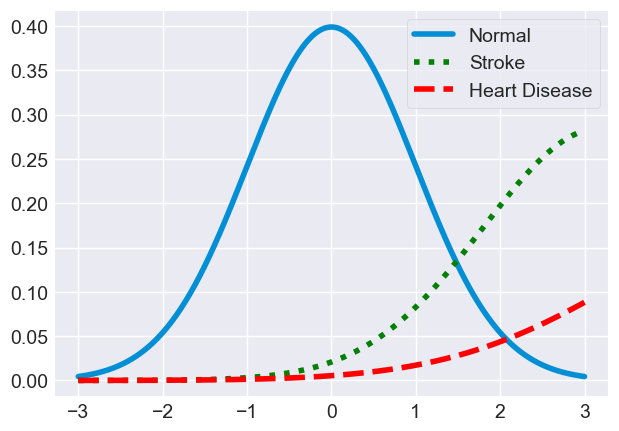

In [807]:
from scipy.stats import norm


x = np.arange(-3, 3, 0.001)

plt.plot(x,norm.pdf(x)) # normal line
plt.plot(x, norm.pdf(x, 3.2, 1.4), 'g:') # mean of 3.2 and std 1.4 of stroke
plt.plot(x, norm.pdf(x, 5.6, 2.1), 'r--') # Heart Disease

plt.legend([ 'Normal', 'Stroke', 'Heart Disease',])
plt.show()

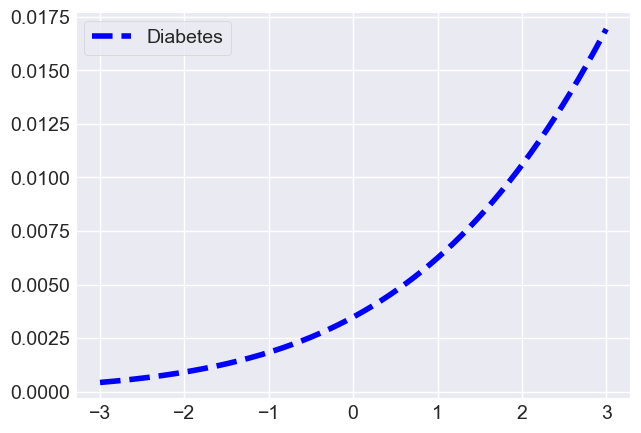

In [808]:
x = np.arange(-3, 3, 0.001)

plt.plot(x, norm.pdf(x, 10.8, 4.2), 'b--') # DB
plt.legend([ 'Diabetes'])
plt.show()

In [809]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [810]:
from scipy.stats import skew

In [811]:
# Cal.  and extract the lowest point lower quantile
df.HD_M_Value.quantile(0.3)

4.4

In [812]:
# Cal.  and extract the highest point upper quantile
df.HD_M_Value.quantile(0.7)


6.1

In [813]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [814]:
# Extract Skewness 
HD_skew = skew(df['HD_M_Value'])
HBP_skew = skew(df['HBP_M_Value'])
HC_skew = skew(df['HC_M_Value'])

OB_skew = skew(df['OB_M_Value'])
DB_skew = skew(df['DB_M_Value'])
STK_skew = skew(df['Target_Value'])

print(HD_skew)
print(HBP_skew)
print(HC_skew)
print(OB_skew)
print(DB_skew)
print(STK_skew)



0.31822550937884453
0.2440983386931991
-0.04141745598724707
0.39347948883113487
0.34294882665638926
0.3327762902205886


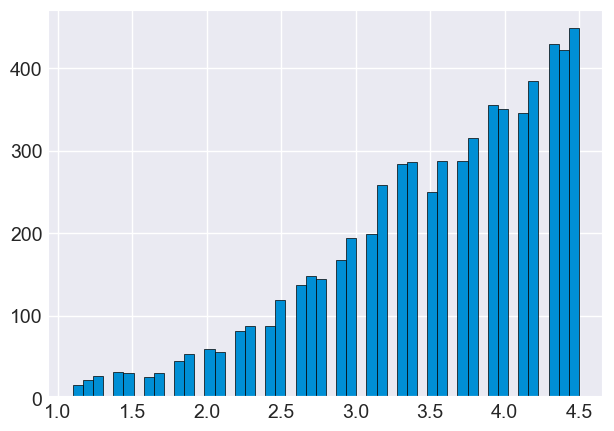

In [815]:
# Highest point of lower quantile
df_HDs = df.loc[df["HD_M_Value"] < 4.6]
#df_HDs["HD_M_Value"]

plt.hist(df_HDs.HD_M_Value, bins=50, edgecolor='black')
plt.show()

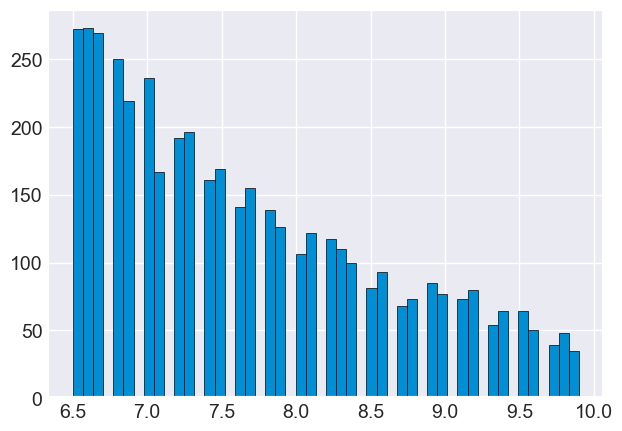

In [816]:
# the highest point upper quantile
df.HD_M_Value.quantile(0.7)
df_HDx = df.loc[df["HD_M_Value"] > 6.4]
#df_HDs["HD_M_Value"]

plt.hist(df_HDx.HD_M_Value, bins=50, edgecolor='black')
plt.show()

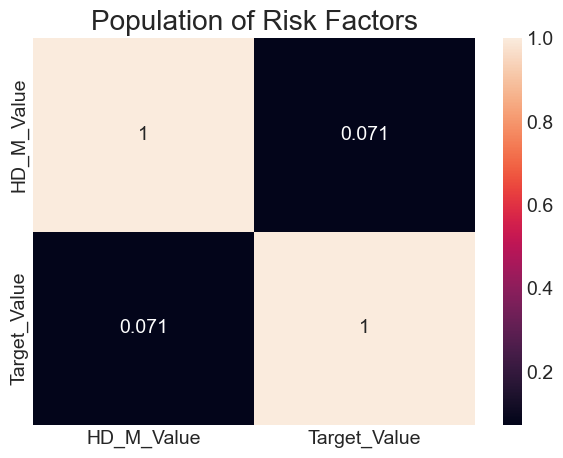

In [817]:
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value','Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

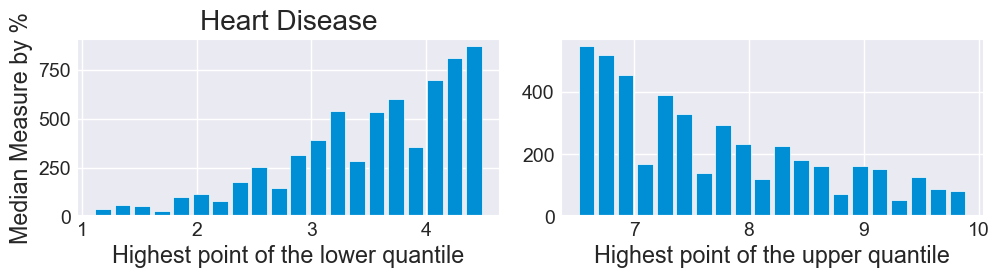

In [818]:

plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 

df_HDs = df.loc[df["HD_M_Value"] < 4.6]

plt.hist(df_HDs.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the lower quantile')
plt.ylabel('Median Measure by %')
plt.title('Heart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')



df_HDx = df.loc[df["HD_M_Value"] > 6.4]

plt.subplot(2,3,2) 
plt.hist(df_HDx.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the upper quantile')
#plt.ylabel('Median Measure by %')
plt.tight_layout()
#plt.legend(loc='upper right')

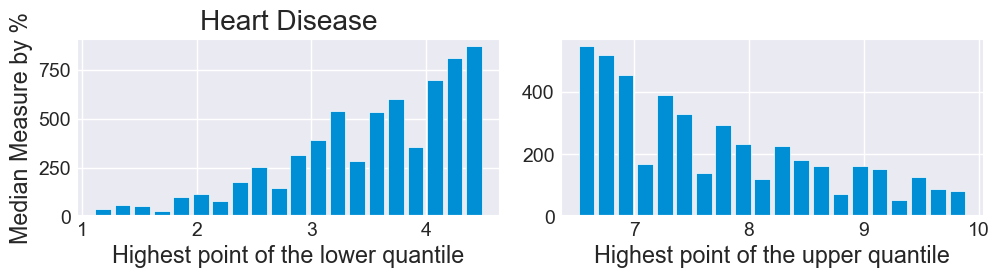

In [819]:
plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 

df_HBPs = df.loc[df["HD_M_Value"] < 4.6]

plt.hist(df_HDs.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the lower quantile')
plt.ylabel('Median Measure by %')
plt.title('Heart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')



df_HDx = df.loc[df["HD_M_Value"] > 6.4]

plt.subplot(2,3,2) 
plt.hist(df_HDx.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the upper quantile')
#plt.ylabel('Median Measure by %')
plt.tight_layout()
#plt.legend(loc='upper right')

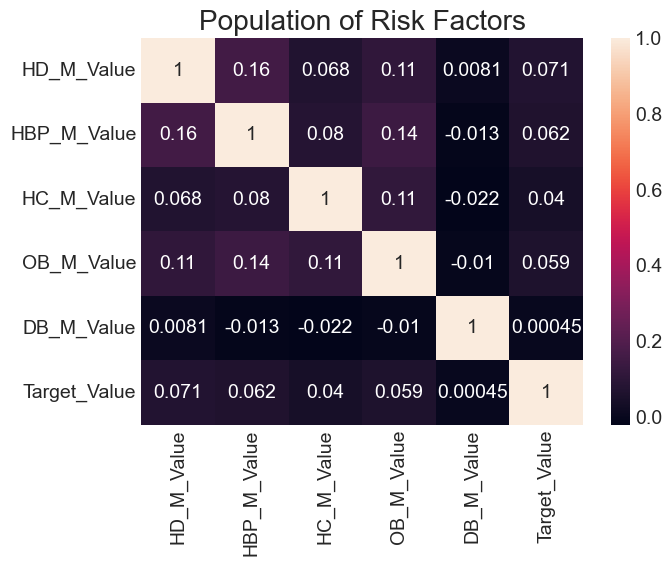

In [820]:
#Heatmap - illustrate from the low to high scales.  It  shows which is skewed to the lower or higher end or from the median.
# Summary: Distribution of all the factors from cities in the US. 
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value', 'HBP_M_Value', 'HC_M_Value', 'OB_M_Value','DB_M_Value', 'Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

Histrograms =  show the frequency of distribution. 

In [822]:
from scipy.stats import poisson


In [823]:
df["DB_M_Value"].describe()

count    19112.000000
mean        10.153558
std          3.429738
min          0.900000
25%          7.700000
50%          9.800000
75%         12.300000
max         18.900000
Name: DB_M_Value, dtype: float64

In [824]:
DB_degree_counts = df['DB_M_Value'].value_counts()

print(DB_degree_counts)

8.9    264
9.1    261
8.3    254
8.4    251
9.4    248
      ... 
0.9      4
2.0      4
1.8      4
1.1      2
1.0      2
Name: DB_M_Value, Length: 180, dtype: int64


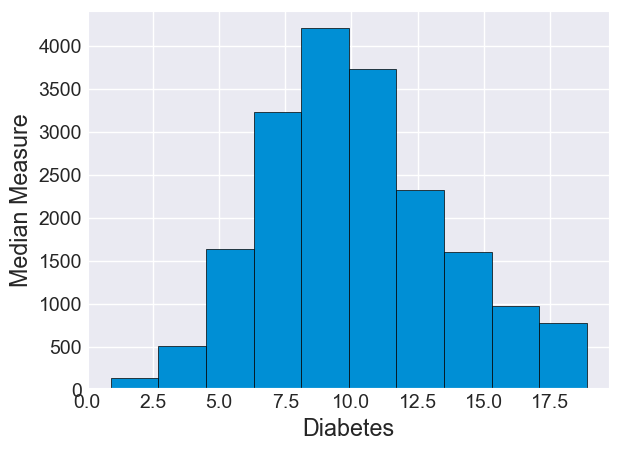

In [825]:
#plt.title('Population by cities')
plt.xlabel('Diabetes')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses = df[['DB_M_Value']]
plt.hist(Diabetses,  edgecolor='black')
plt.show()

In [826]:
df["DB_M_Value"].describe()

count    19112.000000
mean        10.153558
std          3.429738
min          0.900000
25%          7.700000
50%          9.800000
75%         12.300000
max         18.900000
Name: DB_M_Value, dtype: float64

In [ ]:
df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 20.0 ] # 99 records

print(df_DB_O_Less["HC_M_Value"].value_counts())
#print(df_DB_O_Greater["HC_M_Value"].value_counts())


In [828]:
DB_skew = skew(df['DB_M_Value'])

print(DB_skew)

0.34294882665638926


<Axes: xlabel='DB_M_Value'>

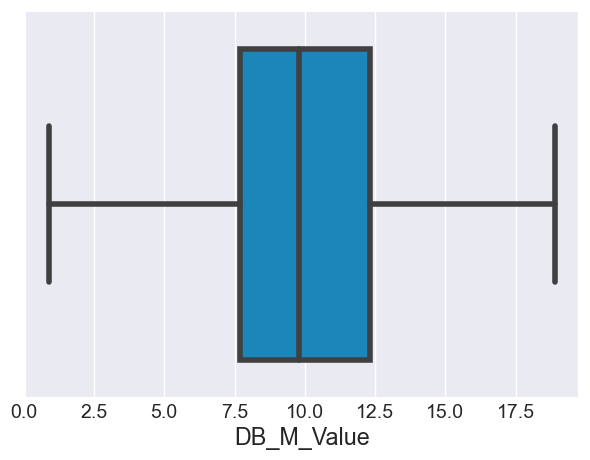

In [829]:
sns.boxplot(x='DB_M_Value', data=df)


C:\Users\dolly\AppData\Local\Temp\ipykernel_2988\1637939683.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DB_M_Value'])


<Axes: xlabel='DB_M_Value', ylabel='Density'>

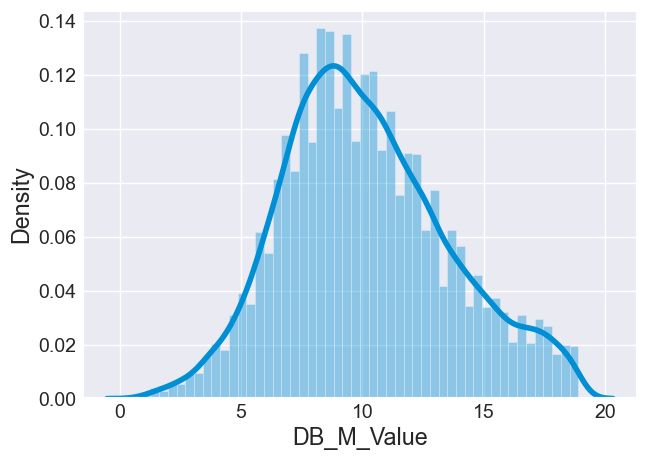

In [830]:
sns.distplot(df['DB_M_Value'])

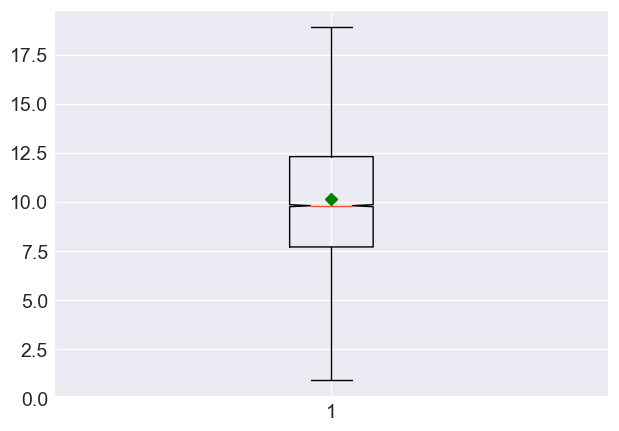

In [831]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['DB_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

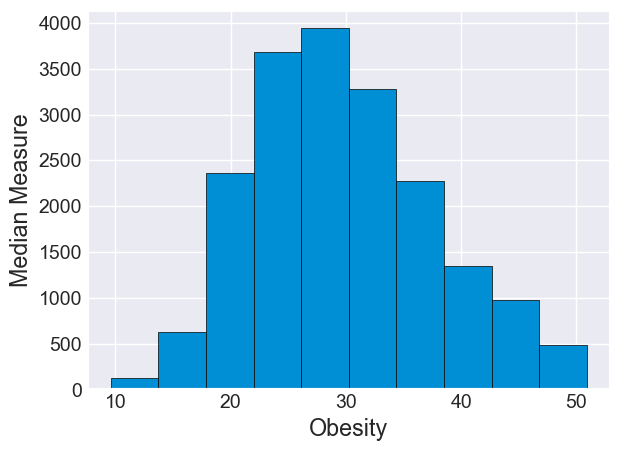

In [832]:
#plt.title('Population by cities')
plt.xlabel('Obesity')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['OB_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

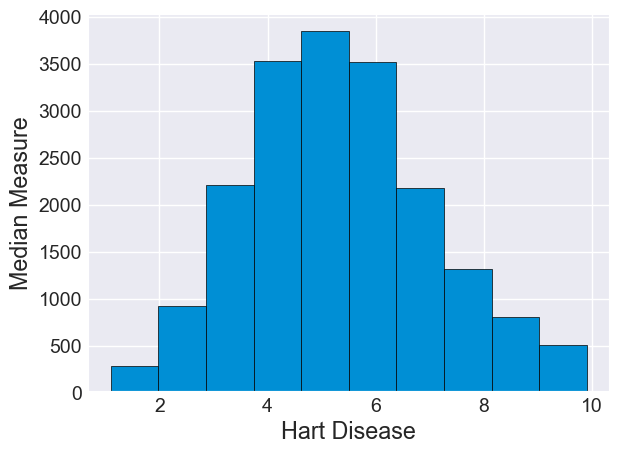

In [833]:
#plt.title('Population')
plt.xlabel('Hart Disease')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HD_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

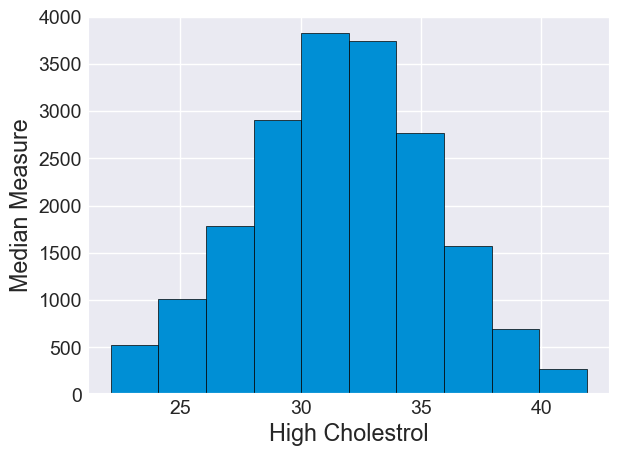

In [834]:
plt.xlabel('High Cholestrol')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HC_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

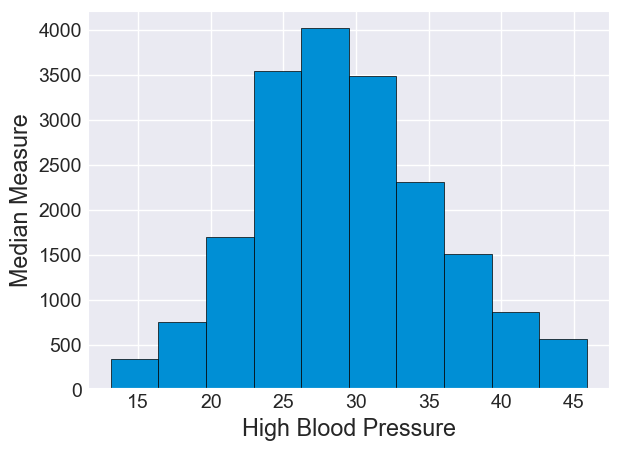

In [835]:
plt.xlabel('High Blood Pressure')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HBP_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

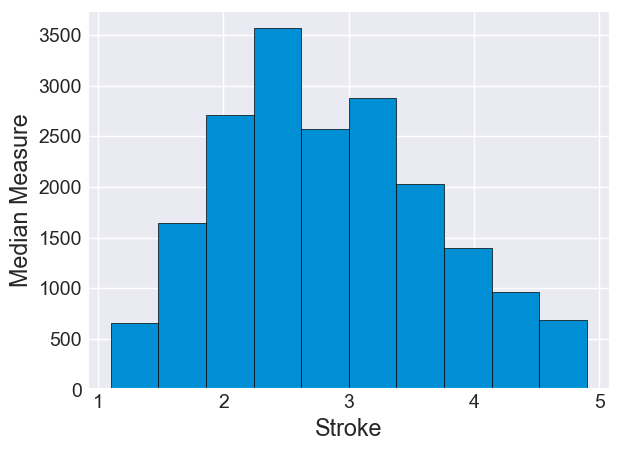

In [836]:
plt.xlabel('Stroke')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['Target_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

In [837]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

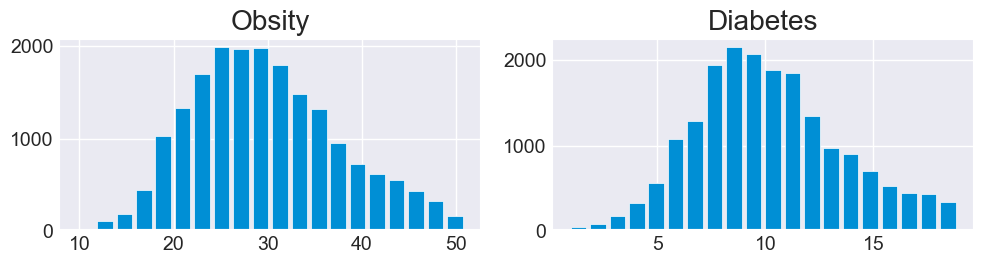

In [838]:
# Histrogram - subplot


plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 
plt.hist(df.OB_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Obsity')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,2) 
plt.hist(df.DB_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Diabetes')
#plt.ylabel('Median Measure')
plt.title('Diabetes')
plt.tight_layout()
#plt.legend(loc='upper right')




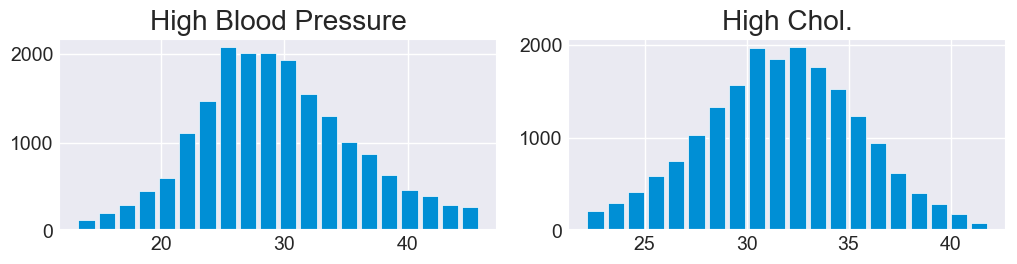

In [839]:


plt.figure(figsize= (15,5))
plt.subplot(2,3,5) 
plt.hist(df.HBP_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('High Blood Pressure')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,6) 
plt.hist(df.HC_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('High Chol.')
plt.tight_layout()
#plt.legend(loc='upper right')




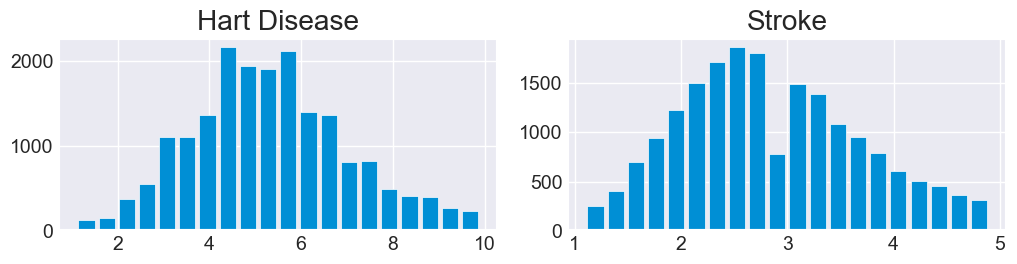

In [840]:


plt.figure(figsize= (15,5))
plt.subplot(2,3,5) 
plt.hist(df.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Hart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,6) 
plt.hist(df.Target_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Stroke')
plt.tight_layout()
#plt.legend(loc='upper right')



In [841]:
np.percentile(df['HD_M_Value'],1)

1.8

In [842]:
np.percentile(df['HD_M_Value'],25)

4.1

In [843]:
np.percentile(df['HD_M_Value'],50)

5.2

In [844]:
np.percentile(df['HD_M_Value'],85)

7.1

In [845]:
np.percentile(df['HD_M_Value'],95)

8.5

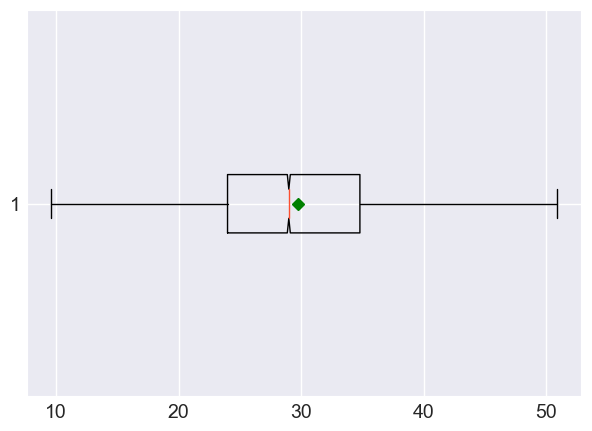

In [846]:
#df['DB_M_Value'].plot(kind='box');
#plt.semilogy
# The line is the median(middle point)
# The diamon is the mean value
# Red circle is the outliers


red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['OB_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

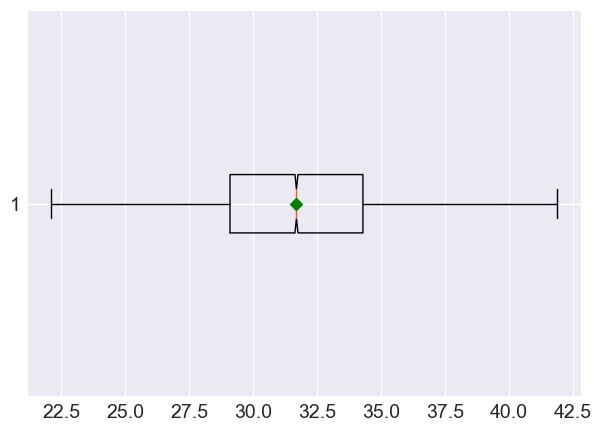

In [847]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HC_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

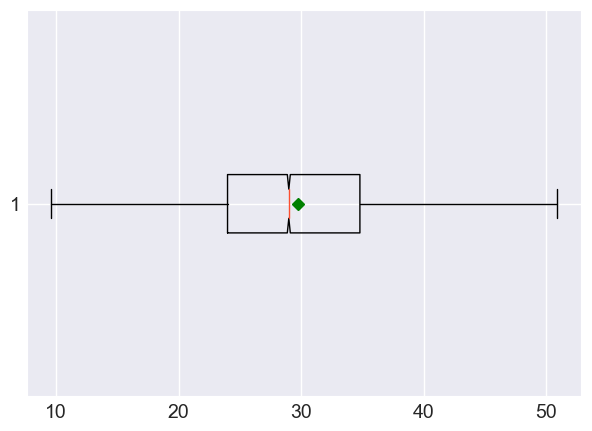

In [848]:

red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['OB_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

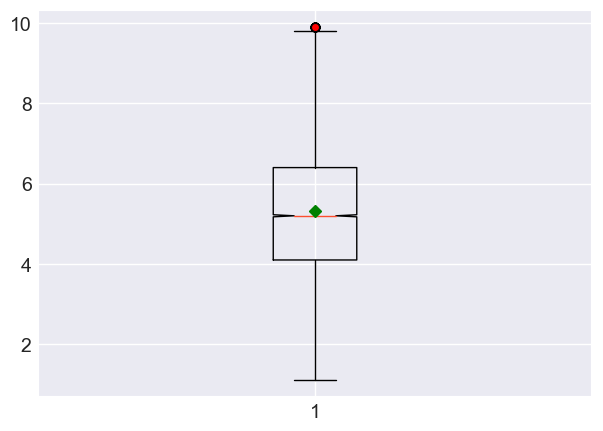

In [849]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HD_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

<Axes: xlabel='DB_M_Value'>

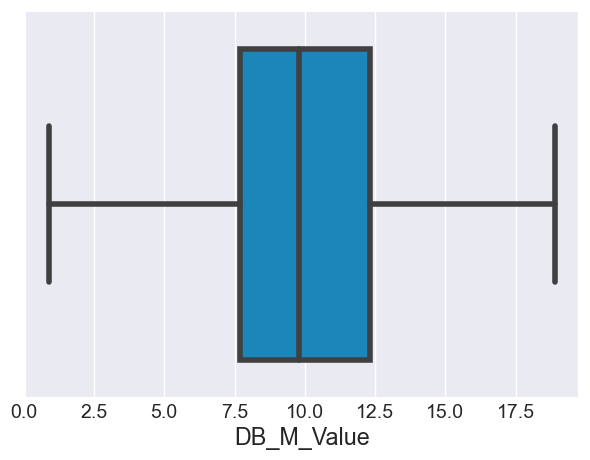

In [850]:
sns.boxplot(x='DB_M_Value', data=df)

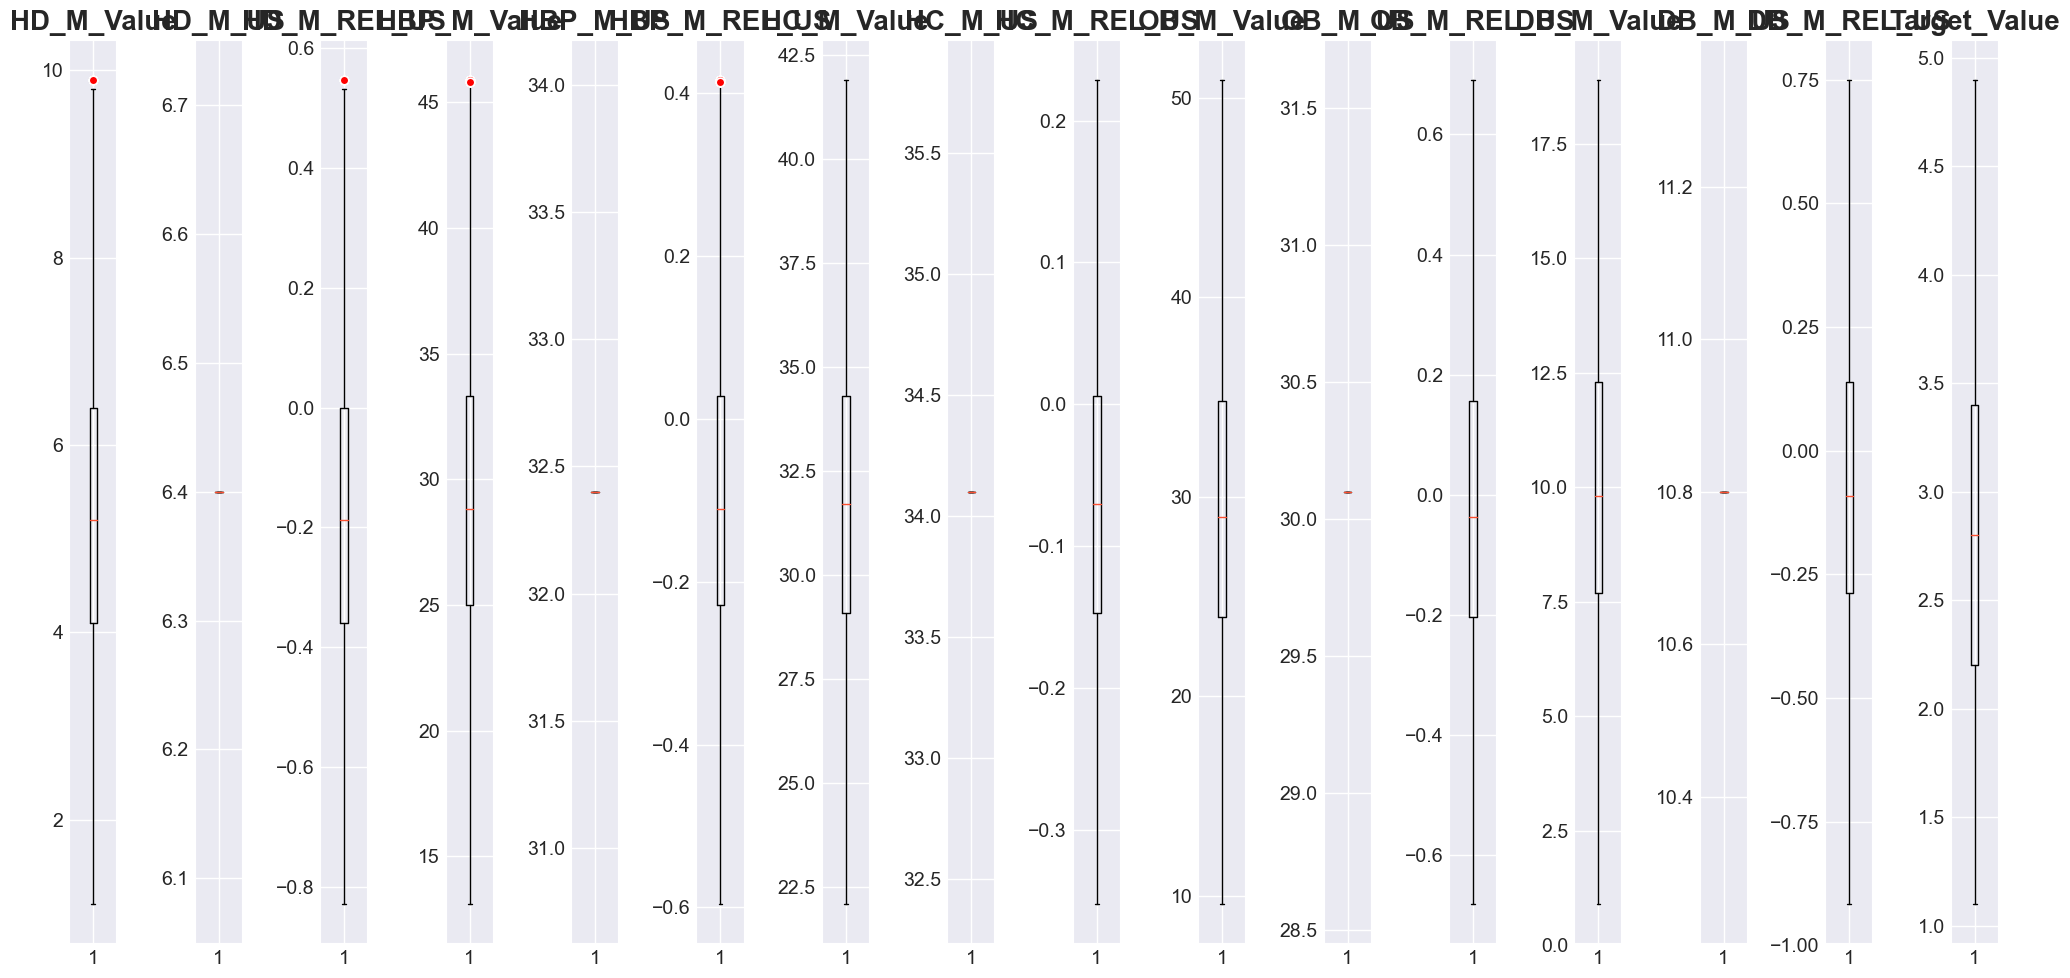

In [851]:
#Subplot


red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    if df.columns[i] == 'HD_M_Value' or  df.columns[i] == 'HD_M_US':
        ax.semilogy
        
plt.tight_layout()

In [852]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583e+00,1.100000,4.100000,5.200000,6.400000,9.900000
HD_M_US,19112.0,6.400000,2.153001e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,19112.0,-0.169463,2.663412e-01,-0.828125,-0.359375,-0.187500,0.000000,0.546875
HBP_M_Value,19112.0,29.301020,6.360551e+00,13.100000,25.000000,28.800000,33.300000,45.900000
HBP_M_US,19112.0,32.400000,1.168873e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,19112.0,-0.095648,1.963133e-01,-0.595679,-0.228395,-0.111111,0.027778,0.416667
HC_M_Value,19112.0,31.673205,3.816437e+00,22.100000,29.100000,31.700000,34.300000,41.900000
HC_M_US,19112.0,34.100000,1.226429e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,19112.0,-0.071167,1.119190e-01,-0.351906,-0.146628,-0.070381,0.005865,0.228739
OB_M_Value,19112.0,29.778746,7.842022e+00,9.600000,24.000000,29.000000,34.800000,50.900000


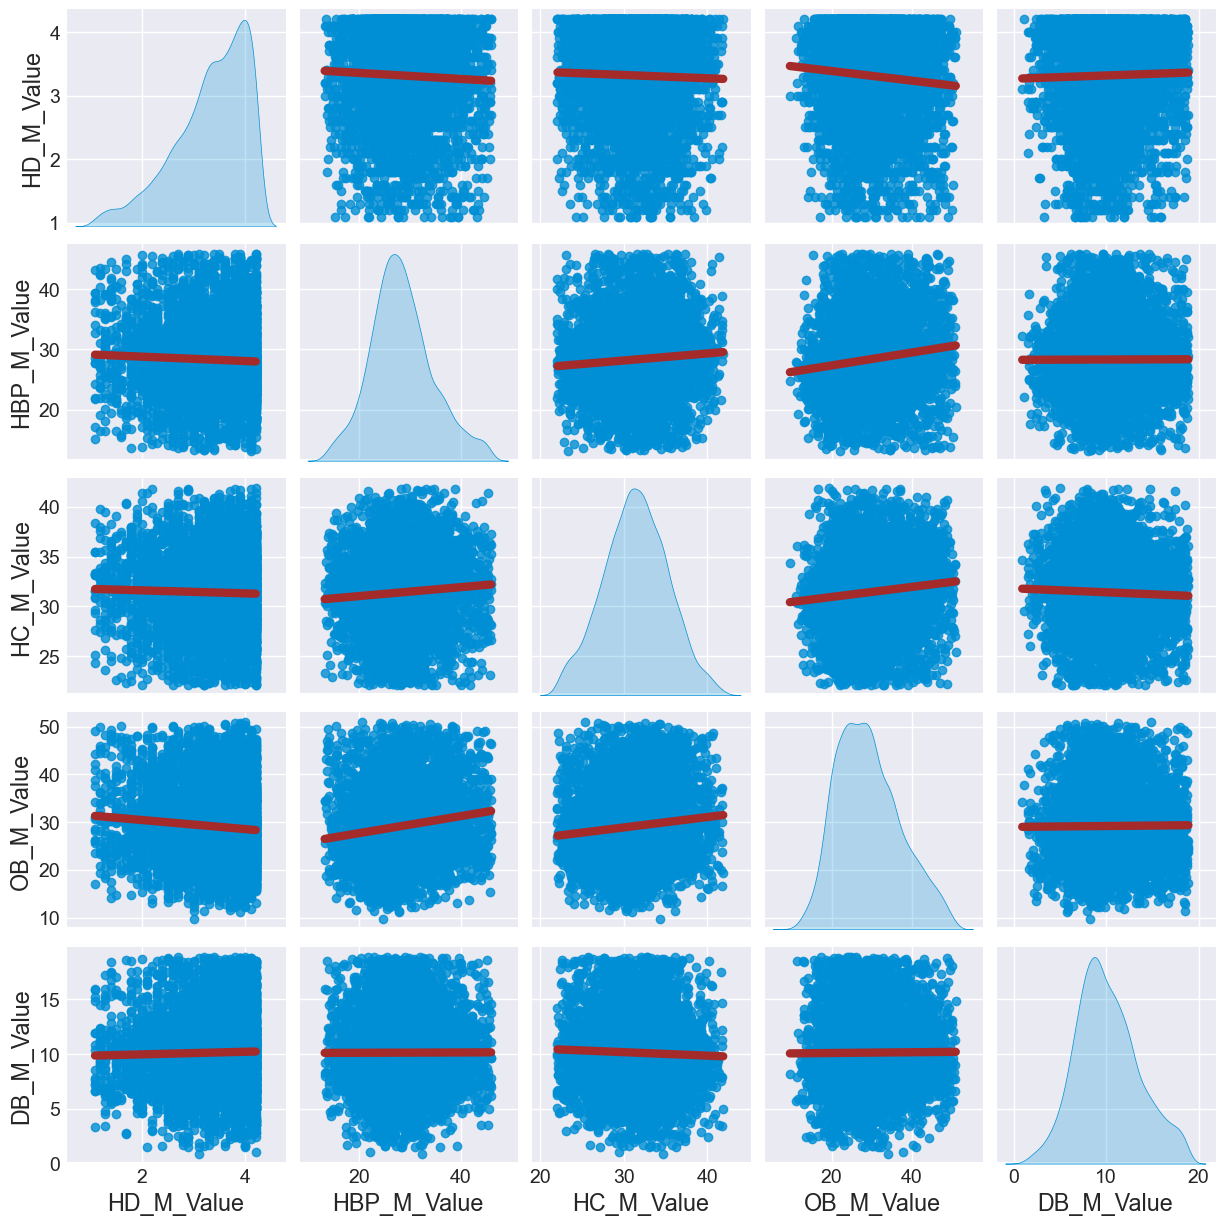

In [853]:
# plot 
df02 = df[df['HD_M_Value'] <= 4.200000 ]
col_to_plot01 = ['HD_M_Value', 'HBP_M_Value', 'HC_M_Value', 'OB_M_Value', 'DB_M_Value']
sns.pairplot(df02[col_to_plot01], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'brown'}})
#sns.pairplot(df02[col_to_plot01], hue='OB_M_Value' )


In [854]:
#Scattler plot - Relationship between Obesity and Diabetes.
#plt.xlabel('High Blood Pressure and Cholesterol')
#plt.ylabel('Stroke')
#plt.scatter(df.HD_M_Value, df.HC_M_Value, color= 'red', marker='*')
#plt.show()



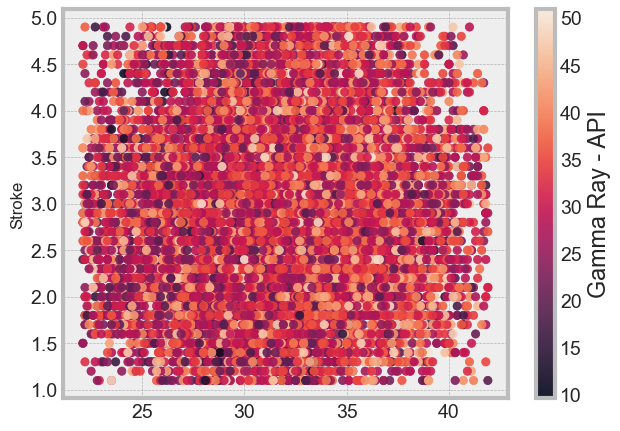

In [899]:
#np.random.seed(19680801)
#N = 50
#plt.style.use('bmh')
# colors = np.random.rand(N)


#plt.scatter(x='HD_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9) # alpha is the clarity of the colors
#plt.scatter(x='HBP_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)
plt.scatter(x='HC_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)
#plt.scatter(x='OB_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)
#plt.scatter(x='DB_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)


#plt.xlabel('Heart Disease', fontsize=12)
#plt.xlabel('High Blood Pressure', fontsize=12)

plt.ylabel('Stroke', fontsize=12)
plt.colorbar(label='Gamma Ray - API')
plt.show()

## Dividing the dataset into independent and dependent features.

In [856]:

X=df.iloc[:, :-1] # Independent features.
y=df.iloc[:, -1]  # dependent feature (Stroke).

#X

ML Analysis - LinearRegression Model

In [900]:
# laod types of model to use.
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [901]:
# Setting up the plit -  Training/Test set.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
#80% training - it chooses ramdom samples.
len(X_train)
#20% or what ever % specified.
len(X_test)

X_train

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US
1898,5.0,6.4,-0.218750,31.1,32.4,-0.040123,26.8,34.1,-0.214076,19.8,30.1,-0.342193,9.5,10.8,-0.120370
8820,4.3,6.4,-0.328125,26.4,32.4,-0.185185,30.4,34.1,-0.108504,32.2,30.1,0.069767,13.5,10.8,0.250000
23188,2.2,6.4,-0.656250,41.1,32.4,0.268519,34.3,34.1,0.005865,41.9,30.1,0.392027,8.2,10.8,-0.240741
6756,4.7,6.4,-0.265625,21.4,32.4,-0.339506,37.5,34.1,0.099707,16.7,30.1,-0.445183,9.0,10.8,-0.166667
26625,5.5,6.4,-0.140625,22.6,32.4,-0.302469,28.4,34.1,-0.167155,36.7,30.1,0.219269,8.3,10.8,-0.231481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12841,6.1,6.4,-0.046875,25.7,32.4,-0.206790,30.8,34.1,-0.096774,41.9,30.1,0.392027,7.2,10.8,-0.333333
12320,6.1,6.4,-0.046875,32.4,32.4,0.000000,28.3,34.1,-0.170088,34.1,30.1,0.132890,9.3,10.8,-0.138889
22215,3.7,6.4,-0.421875,28.2,32.4,-0.129630,22.2,34.1,-0.348974,48.6,30.1,0.614618,13.4,10.8,0.240741
1854,4.0,6.4,-0.375000,23.8,32.4,-0.265432,31.9,34.1,-0.064516,29.3,30.1,-0.026578,8.1,10.8,-0.250000


ML Analyzing using - Linear Regression Model.

In [902]:
# Fit/load into a model
modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)
#y_test

LinearRegression()

In [903]:

modelReg.predict(X_test) # Run predication of X test
modelReg.score(X_test,y_test) # See the performance of the test, the resutls diff on each run
y_pred = modelReg.predict(X_test) # define variable for X test

print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))
print(mean_absolute_percentage_error(y_pred,y_test))  # Verify error

# The mean of the absolute error - this is mean of the residuat error of the test.

r2:-82.41586019725021  
mae:0.6840478946990488  
-82.41586019725021
0.6840478946990488
0.24034497082750816


ML Analyzing using - Decision Tree Model.

In [904]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)
modelDT.predict(X_test)
#y_test  


modelDT.predict(X_test) # Run predication of X test
modelDT.score(X_test,y_test) # See the performance of the test, the resutls diff on each run
y_pred = modelDT.predict(X_test) # define variable for X test


print(mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))

0.3866469069329642
r2:-0.8753766236256559  
mae:0.9866062085803976  
-0.8753766236256559
0.9866062085803976


#### ML Analyzing using - RandomForestRegressor Model.

In [905]:
from sklearn.ensemble import RandomForestRegressor


modelRF = RandomForestRegressor()
modelRF.fit(X_train,y_train)
modelRF.predict(X_test)
y_test
modelRF.score(X_test,y_test)
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
y_pred = modelRF.predict(X_test)

mean_absolute_percentage_error(y_pred,y_test)
print("r2:{} ".format(r2_score(y_pred,y_test)))
print("mae:{} ".format(mean_absolute_error(y_pred,y_test)))
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))


r2:-13.89379788873893 
mae:0.7062575863271713 
-13.89379788873893
0.7062575863271713
